In [2]:
#Xin quyền GG Drive
from google.colab import drive
drive.mount('/content/ggdrive')

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


In [5]:
#import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/ggdrive/MyDrive/Data Analysis/Thực tập/Data/all_ts_tima_cic_1.csv')
df.head()

,SoTienDKVayBanDau,TienGiaiNgan,SoTienConLai,application_date,TS_CREDIT_SCORE_V2,Số điện thoại khách hàng,FromDate,ID,LoanID,ToDate,...,Address,CheckTime,Brieft,NumberOfLoans,HasBadDebt,HasLatePayment,Điểm tín dụng,Tỉ lệ giải ngân trên số tiền đăng ký,Age,LoanDuration
0,6000000,6000000,0,"Friday, August 5, 2016",540,972830886,8/5/2016 0:00,289,22421,9/3/2016 0:00,...,"VAN TRI, MINH KHAI P. THE T",3/17/2019 11:30,2,2,0,0,Thấp,1.0,39,29
1,6000000,6000000,0,"Monday, September 12, 2016",540,972830886,9/12/2016 0:00,905,29465,11/10/2016 0:00,...,"VAN TRI, MINH KHAI P. THE T",3/17/2019 11:30,2,2,0,0,Thấp,1.0,39,59
2,10000000,10000000,0,"Monday, August 22, 2016",489,979462183,8/22/2016 0:00,417,25368,9/5/2016 0:00,...,. CAU GIAY,3/17/2019 12:42,0,0,0,0,Thấp,1.0,40,14
3,10000000,10000000,0,"Tuesday, September 13, 2016",489,979462183,9/13/2016 0:00,967,29736,10/12/2016 0:00,...,. CAU GIAY,3/17/2019 12:42,0,0,0,0,Thấp,1.0,40,29
4,10000000,10000000,0,"Tuesday, May 9, 2017",671,368616446,5/9/2017 0:00,99202,47683,12/4/2017 0:00,...,"SỐ 3 NGÕ LIÊN TRÌ, -, TRẦN HƯNG ĐẠO, Q.HOÀN KI...",3/17/2019 11:16,cb1,-1,1,0,Trung bình,1.0,34,209


Tìm các đặc điểm ảnh hưởng lớn đến nợ xấu/trễ hạn

<ipython-input-4-46944cf52190>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HasBadDebt', y='TS_CREDIT_SCORE_V2', data=df, palette='Set3')


<Axes: xlabel='HasBadDebt', ylabel='TS_CREDIT_SCORE_V2'>

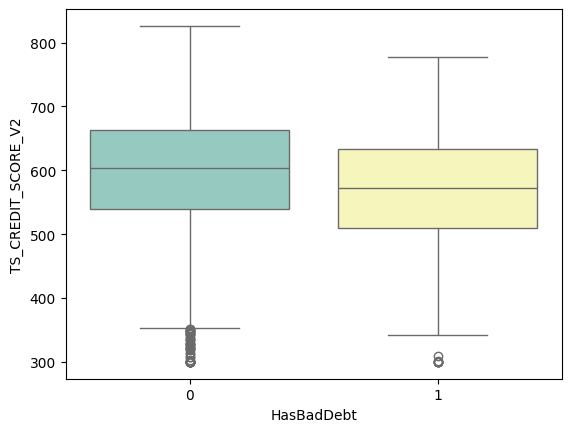

In [ ]:
# Điểm tín dụng thấp (TS_CREDIT_SCORE_V2)
sns.boxplot(x='HasBadDebt', y='TS_CREDIT_SCORE_V2', data=df, palette='Set3')


<ipython-input-5-4e922e70df89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HasBadDebt', y='Salary', data=df, palette='Set3')


(2000000.0, 25000000.0)

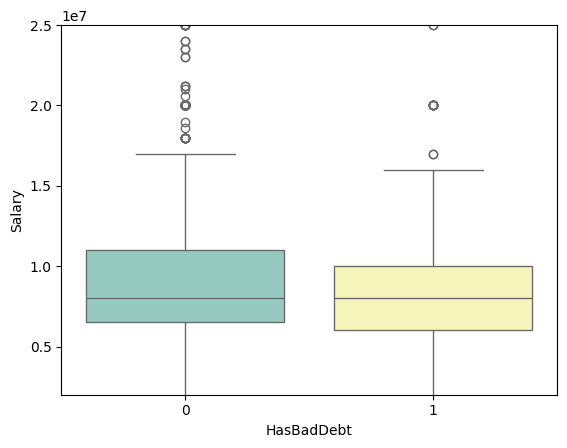

In [ ]:
#Thu nhập
sns.boxplot(x='HasBadDebt', y='Salary', data=df, palette='Set3')
plt.ylim(2000000,25000000)

<ipython-input-6-bf7fa7a1b5d0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HasBadDebt', y='LoanDuration', data=df, palette='Set3')


<Axes: xlabel='HasBadDebt', ylabel='LoanDuration'>

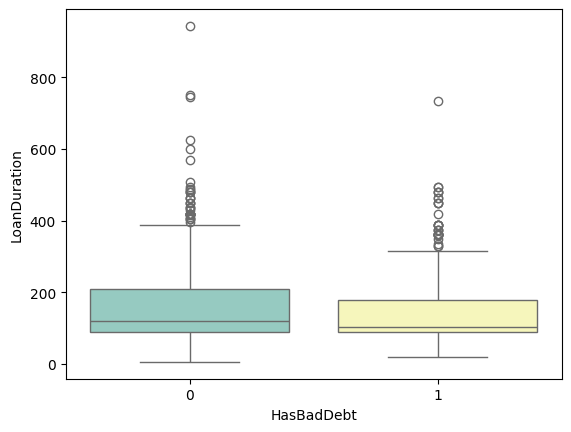

In [ ]:
sns.boxplot(x='HasBadDebt', y='LoanDuration', data=df, palette='Set3')

In [ ]:
#Tạo cột LoanDuration
df['LoanDuration'] = (pd.to_datetime(df['ToDate']) - pd.to_datetime(df['FromDate'])).dt.days
#Lưu vào df
#df.to_csv('/content/ggdrive/MyDrive/Data Analysis/Thực tập/Data/all_ts_tima_cic_1.csv', index=False)

<Axes: xlabel='SoTienDKVayBanDau', ylabel='LoanDuration'>

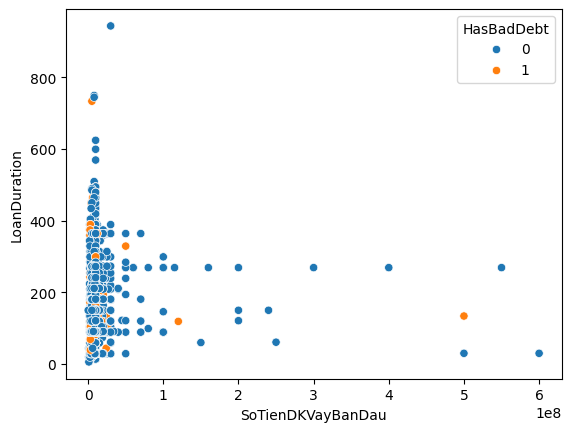

In [ ]:
#Số tiền vay lớn và thời hạn vay dài
sns.scatterplot(x='SoTienDKVayBanDau', y='LoanDuration', hue='HasBadDebt', data=df)

<Axes: xlabel='JobName'>

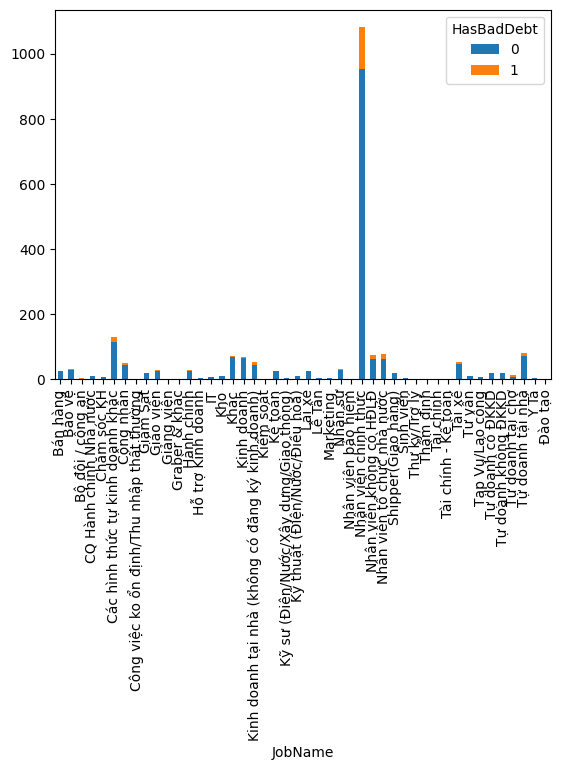

In [ ]:
#Theo ngành nghề
pd.crosstab(df['JobName'], df['HasBadDebt']).plot(kind='bar', stacked=True)

<Axes: xlabel='SoTienDKVayBanDau', ylabel='LoanDuration'>

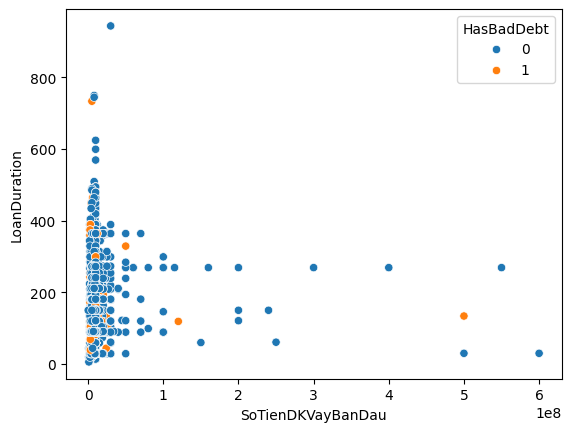

In [ ]:
sns.scatterplot(x='SoTienDKVayBanDau', y='LoanDuration', hue='HasBadDebt', data=df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Dư nợ giảm dần cố định ngày đóng lãi'),
  Text(1, 0, 'Dư nợ giảm dần theo chu kỳ'),
  Text(2, 0, 'Lãi ngày'),
  Text(3, 0, 'Tất toán cuối kỳ')])

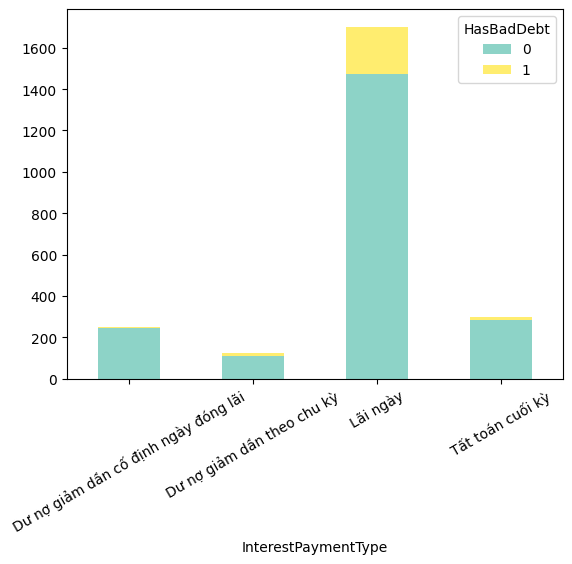

In [ ]:
#Hình thức thanh toán
pd.crosstab(df['InterestPaymentType'], df['HasBadDebt']).plot(kind='bar', stacked=True, colormap='Set3')
plt.xticks(rotation=30)


In [ ]:
#Bỏ các cột không phải số
df = df.select_dtypes(include=['number'])

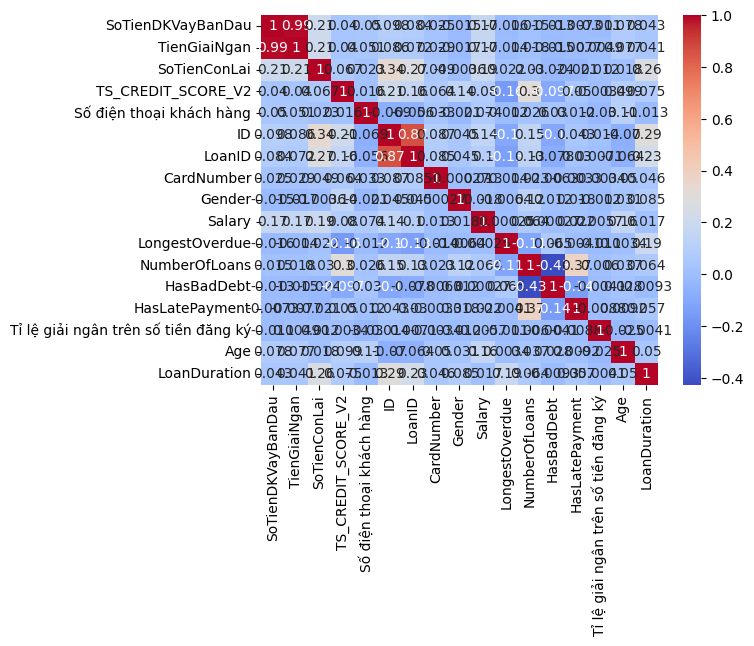

In [ ]:
#Biểu đồ heatmap tương quan giữa các cột với cột hasbaddebt
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#lọc ra những cột có mối tương quan cao đối với cột HasBadDebt
corr_with_baddebt = corr['HasBadDebt'].sort_values(ascending=False)
print(corr_with_baddebt)

HasBadDebt                              1.000000
LongestOverdue                          0.065064
Số điện thoại khách hàng                0.030373
Age                                     0.028390
Gender                                  0.011526
Salary                                  0.000269
Tỉ lệ giải ngân trên số tiền đăng ký   -0.004125
CardNumber                             -0.006322
LoanDuration                           -0.009347
SoTienDKVayBanDau                      -0.013233
TienGiaiNgan                           -0.015275
SoTienConLai                           -0.024182
LoanID                                 -0.077924
TS_CREDIT_SCORE_V2                     -0.096886
ID                                     -0.101306
HasLatePayment                         -0.143150
NumberOfLoans                          -0.427409
Name: HasBadDebt, dtype: float64


<Axes: xlabel='NumberOfLoans', ylabel='HasBadDebt'>

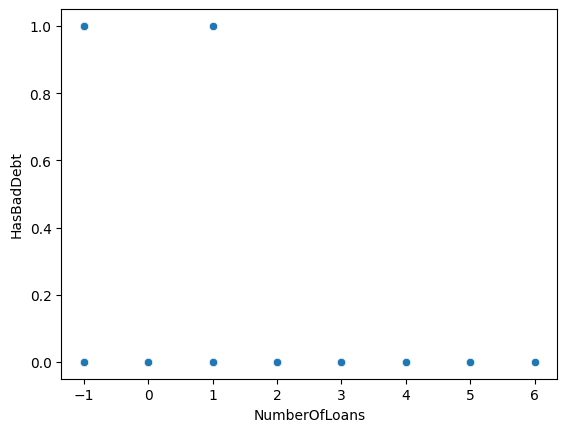

In [ ]:
#Vẽ biểu đồ thể hiện mối quan hệ giwuax NumberOfLoans và HasBadDebt
sns.scatterplot(x='NumberOfLoans', y='HasBadDebt', data=df)

In [ ]:
df = pd.read_csv('/content/ggdrive/MyDrive/Data Analysis/Thực tập/Data/all_ts_tima_cic_1.csv')

<Axes: xlabel='Thời gian đã sống', ylabel='Count'>

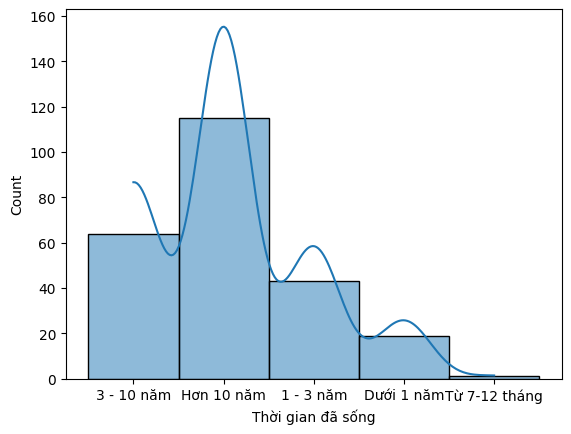

In [ ]:
#phân phối thời gian sống của khách hàng có nợ xấu
sns.histplot(data=df[df['HasBadDebt'] == 1], x='Thời gian đã sống', kde=True)

##**Dự báo khả năng khách hàng có nợ xấu (Bad Debt Prediction)**
- Biến mục tiêu: HasBadDebt (Có nợ xấu: 0 - Không, 1 - Có).
- Cách tính:
  - Có nợ xấu: Nếu khách hàng có lịch sử nợ xấu (HasBadDebt = 1).
  - Không có nợ xấu: Nếu khách hàng không có lịch sử nợ xấu (HasBadDebt = 0).

In [6]:
df = pd.read_csv('/content/ggdrive/MyDrive/Data Analysis/Thực tập/Data/all_ts_tima_cic_1.csv')

In [7]:
df = df[["CreditInfo","Brieft","Name","Address","FullName.1","CityCompany","RelativeFamilyName",'HasBadDebt',"JobName","WardNameHouseHold","WardName","Salary","Age","Street","ProductCreditName","Điểm tín dụng","DescriptionPositionJob","Birthday","NameCompany","LongestOverdue","FirstName","Thời gian đã sống","ReceiveYourIncomeSalary","FullNameFamily","CityNameHouseHold","CityName","InterestPaymentType","AddressCompany","Trạng thái","TS_CREDIT_SCORE_V2","Gender"]]

## Mô hình SVM

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Mã hóa các cột phân loại
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Đảm bảo chuyển tất cả giá trị thành chuỗi
    label_encoders[col] = le

#Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[list(set(df.columns)-set(['HasBadDebt']))] = scaler.fit_transform(df[list(set(df.columns)-set(['HasBadDebt']))])
df = df.dropna()

# Tải dữ liệu
X = df[list(set(df.columns)-set(['HasBadDebt']))]  # Các biến độc lập
y = df['HasBadDebt']  # Biến phụ thuộc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm = SVC(kernel='linear',class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Đánh giá
print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(svm.coef_[0])  # Take the absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Linear SVM):")
print(feature_importances)



Support Vector Machine (SVM):
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       635
           1       0.58      0.97      0.72        77

    accuracy                           0.92       712
   macro avg       0.79      0.94      0.84       712
weighted avg       0.95      0.92      0.93       712

Confusion Matrix:
 [[580  55]
 [  2  75]]

Feature Importances (Linear SVM):
                    Feature  Importance
22               CreditInfo    3.519226
15                     Name    1.613834
5                FullName.1    1.242077
18                  Address    0.416296
2   ReceiveYourIncomeSalary    0.207381
0         WardNameHouseHold    0.191347
11                 WardName    0.173346
9            LongestOverdue    0.155192
7         CityNameHouseHold    0.140400
26                 Birthday    0.124947
8             Điểm tín dụng    0.111253
29      InterestPaymentType    0.107148
20    

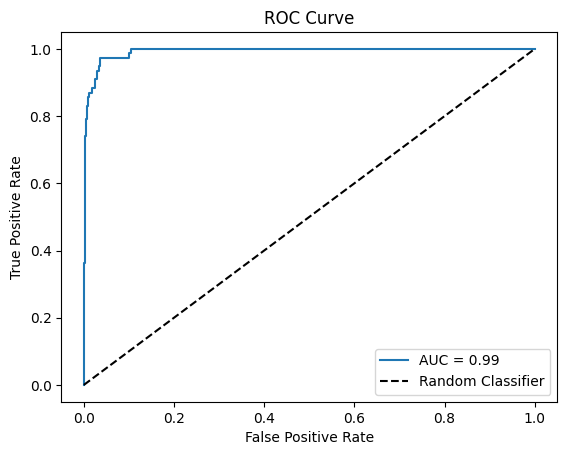

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Khởi tạo SVM với probability=True
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Dự đoán xác suất
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Xác suất cho lớp 1

# Tính ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Vẽ đồ thị ROC
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [12]:
# Lưu mô hình
joblib.dump(svm, 'svm_model.pkl')  # Tệp sẽ được lưu dưới dạng svm_model.pkl


['svm_model.pkl']

In [ ]:
import joblib
import pandas as pd


# Nạp mô hình đã lưu
model = joblib.load('svm_model.pkl')

# Chuẩn bị dữ liệu khách hàng
new_customer = pd.DataFrame({
    'TS_CREDIT_SCORE_V2': [750],  # Điểm tín dụng
    'Salary': [15000000],         # Mức lương
    'JobName': [3],               # Nghề nghiệp (đã mã hóa)
    'Gender': [1]                 # Nam (1), Nữ (0)
})

# Chuẩn hóa dữ liệu nếu cần
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_customer_scaled = scaler.fit_transform(new_customer)

# Dự đoán
prediction = model.predict(new_customer_scaled)
probability = model.predict_proba(new_customer_scaled)

print("Kết quả dự đoán:", prediction[0])
print("Xác suất dự đoán:", probability)

##Mô hình Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Mã hóa các cột phân loại
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Đảm bảo chuyển tất cả giá trị thành chuỗi
    label_encoders[col] = le


# Tải dữ liệu
X = df.drop(columns=['HasBadDebt'])  # Các biến độc lập
y = df['HasBadDebt']  # Biến phụ thuộc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Đánh giá
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Lấy ra tầm quan trọng của các thuộc tính
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)



Random Forest:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       635
           1       1.00      1.00      1.00        77

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

Confusion Matrix:
 [[635   0]
 [  0  77]]

Feature Importances:
                    Feature  Importance
0                CreditInfo    0.395916
1                    Brieft    0.348984
3                   Address    0.097019
2                      Name    0.064013
8                  WardName    0.011243
4                FullName.1    0.007749
15   DescriptionPositionJob    0.007280
26           AddressCompany    0.005380
16                 Birthday    0.005342
19                FirstName    0.004617
11                      Age    0.004609
13        ProductCreditName    0.004568
7         WardNameHouseHold    0.0

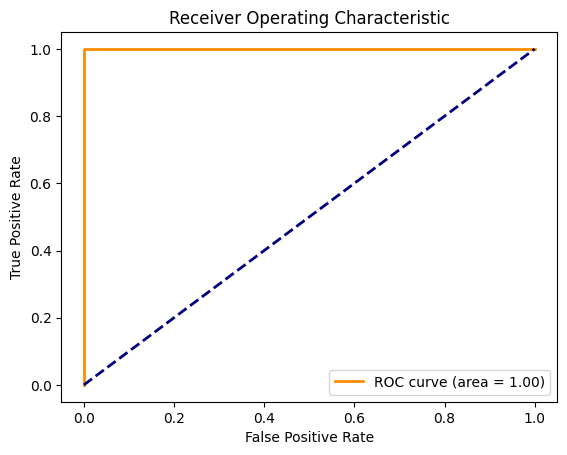

In [ ]:
#Tính ROC Đánh giá khả năng phân biệt giữa các lớp của mô hình.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dự đoán xác suất cho tập kiểm tra
y_prob = rf.predict_proba(X_test)[:, 1]

# Tính toán ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Vẽ ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()